In [48]:
import pandas as pd
import numpy as np

df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
obj_cols=df.select_dtypes(include='object').columns
for i in obj_cols:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isnull().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17416\631002807.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
cols=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in cols:
    df[i].fillna(df[i].mean(),inplace=True)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17416\1190119706.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<Axes: >

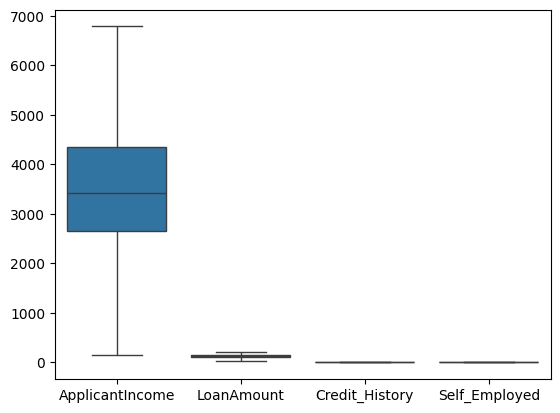

In [ ]:
cols=['ApplicantIncome','LoanAmount','Credit_History','Self_Employed']

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df=df[(df[i]>=lb) & (df[i]<=ub)]
X=df[cols]
y=df['Loan_Status']
sns.boxplot(df[cols])



In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ss=StandardScaler()
svm_linear=SVC(kernel='linear',C=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

svm_linear.fit(X_train,y_train)

y_pred_linear=svm_linear.predict(X_test)
print("Accuracy:",accuracy_score(y_pred_linear,y_test))
print("Classification Report:\n",classification_report(y_pred_linear,y_test))
print("Confusion matrix:\n",confusion_matrix(y_pred_linear,y_test))

Accuracy: 0.7678571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87        56

    accuracy                           0.77        56
   macro avg       0.50      0.38      0.43        56
weighted avg       1.00      0.77      0.87        56

Confusion matrix:
 [[ 0  0]
 [13 43]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [110]:
svm_poly=SVC(kernel='poly',degree=5,C=1)
svm_poly.fit(X_train,y_train)
y_pred_poly=svm_poly.predict(X_test)
print("Accuracy:",accuracy_score(y_pred_poly,y_test))
print("classification_report:\n",classification_report(y_pred_poly,y_test))
print("Confusion matrix:\n",confusion_matrix(y_pred_poly,y_test))

Accuracy: 0.7857142857142857
classification_report:
               precision    recall  f1-score   support

           0       0.08      1.00      0.14         1
           1       1.00      0.78      0.88        55

    accuracy                           0.79        56
   macro avg       0.54      0.89      0.51        56
weighted avg       0.98      0.79      0.86        56

Confusion matrix:
 [[ 1  0]
 [12 43]]


In [91]:
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)
print("Accuracy:",accuracy_score(y_pred_rbf,y_test))
print("classification_report:\n",classification_report(y_pred_rbf,y_test))
print("Confusion matrix:\n",confusion_matrix(y_pred_rbf,y_test))

Accuracy: 0.7678571428571429
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87        56

    accuracy                           0.77        56
   macro avg       0.50      0.38      0.43        56
weighted avg       1.00      0.77      0.87        56

Confusion matrix:
 [[ 0  0]
 [13 43]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

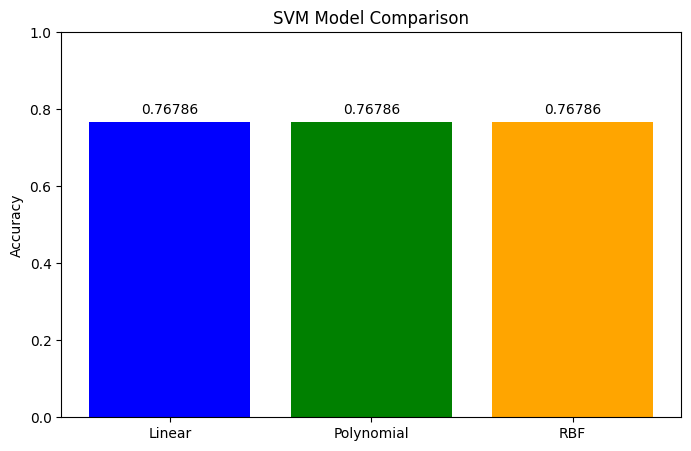

In [97]:
import matplotlib.pyplot as plt
models = ['Linear', 'Polynomial', 'RBF']
accuracies = [accuracy_score(y_test, y_pred_linear),
              accuracy_score(y_test, y_pred_poly),
              accuracy_score(y_test, y_pred_rbf)]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('SVM Model Comparison')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.5f}', ha='center')
plt.show()